In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'Dataset/TUM/CU_Cyclic/CU000_cyc/New_BW-VTC-249_1013_CU_cyc_000_BW-VTC-CYC.csv'
data = pd.read_csv(file_path)

# Identify discharge cycles
data['DischargeFlag'] = data['I'] < 0
data['CycleId'] = (data['DischargeFlag'] & ~data['DischargeFlag'].shift(1).fillna(False)).cumsum()

# Filter out only discharge data
discharge_data = data[data['DischargeFlag'] == True]

# Calculate the capacity for all discharge cycles
unique_cycle_ids = discharge_data['CycleId'].unique()
cycle_capacities = {}
for cycle_id in unique_cycle_ids:
    cycle_data = discharge_data[discharge_data['CycleId'] == cycle_id]
    if not cycle_data.empty:
        ah_start = cycle_data['Ah'].min()
        ah_end = cycle_data['Ah'].max()
        cycle_capacity = ah_end - ah_start
        cycle_capacities[cycle_id] = cycle_capacity

# Output the capacities
print("Capacities of Discharge Cycles (Ah):")
for cycle_id, capacity in cycle_capacities.items():
    print(f"Cycle {cycle_id}: {capacity} Ah")

# Plotting discharge curves
plt.figure(figsize=(12, 8))
for cycle_id in unique_cycle_ids:
    cycle_data = discharge_data[discharge_data['CycleId'] == cycle_id]
    plt.plot(cycle_data['Ah'], cycle_data['U'], label=f'Cycle {cycle_id}')

plt.xlabel('Ampere-hours (Ah)')
plt.ylabel('Voltage (U)')
plt.title('Discharge Curves for Each Cycle')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
def main():
    file_path =r'E:\Thesis CEVT\Dataset\TUM\CU_Cyclic\CU000_cyc\New_BW-VTC-211_2229_CU_cyc_000_BW-VTC-CYC.csv'
    data = pd.read_csv(file_path)
    cycles(data)

Capacities of Discharge Cycles (Ah):
Cycle 1: 0.0 Ah
Cycle 2: 2.46531142162246 Ah
Cycle 3: 0.0 Ah
Cycle 4: 2.5158881594115803 Ah
Cycle 5: 0.0 Ah
Cycle 6: 2.50689598192478 Ah
Cycle 7: 0.0 Ah
Cycle 8: 0.01254836068859011 Ah
Cycle 9: 0.0 Ah
Cycle 10: 0.0 Ah
Cycle 11: 0.0126677435440686 Ah
Cycle 12: 0.0 Ah
Cycle 13: 0.0 Ah
Cycle 14: 0.012639611254552041 Ah
Cycle 15: 0.5016902103960009 Ah


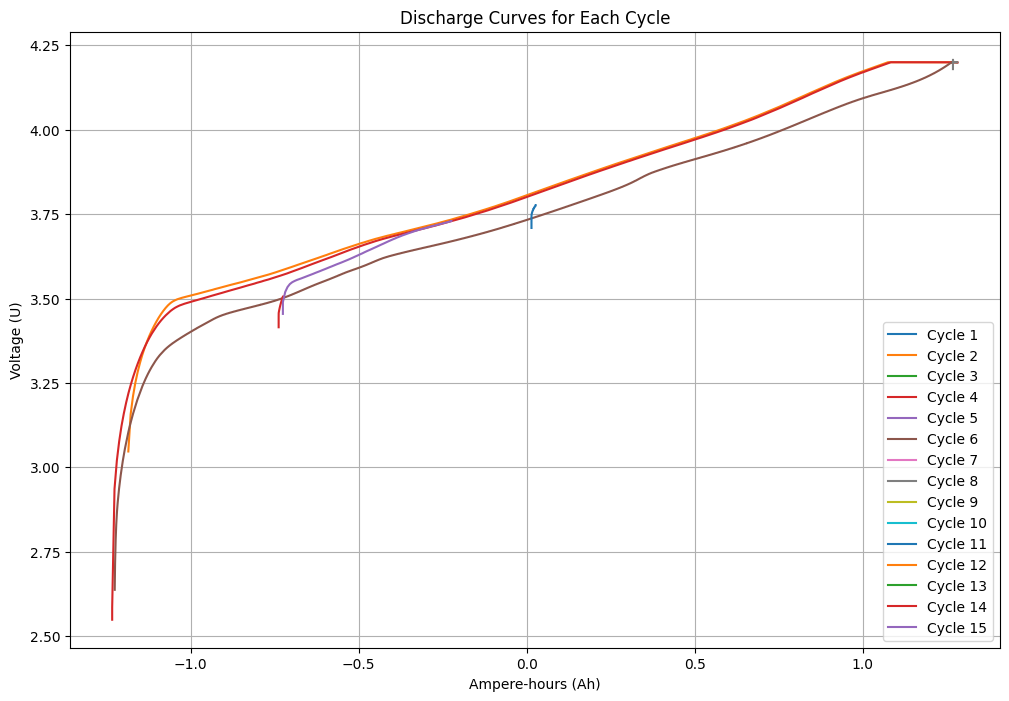

In [22]:
if __name__=="__main__":
    main()